In [2]:
#import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as cp
import numpy as np

'''Declearning Constand and Inputs =================='''
t1= time.time()
# Constants (all MKS, except energy which is in eV)
hbar = 1.06e-34
q = 1.6e-19
IE = (q*q) / (2 * cp.pi * hbar)
Ef = 2.25
kT = 0.025
Ecc = 3.02

#Effective mass in lattice for insulator and ferromagnet
mc = 0.18*9.1e-31
mf = 0.8*9.1e-31

# Inpupt a =size of lattice
a = 0.25e-10

#t0, tm are values of t in channel and magnet repectivily (NOTE:for now we have asumme energy Ec is same in both)
t0 = (hbar**2) / (2 * mc * (a**2) * q)
tm = (hbar**2) / (2 * mf * (a**2) * q)

#Lattice  point in Transverse Direction
Ds = 1 #Size of domain
Nd = 500 #No of domains
Np = Ds*Nd #Number of atom in transverse direction



In [3]:
Np=Ds*Nd
'''These Hamaltonian are in transverse  direction and intially, Effective mass of ''' 
T_trans = 2*t0*cp.diag(cp.ones(2*Np))-t0*cp.diag(cp.ones(2*Np-2),2)-t0*cp.diag(cp.ones(2*Np-2),-2)
T_eig = cp.linalg.eigvalsh(T_trans)

#Magnetic texture for right contact
delt = cp.pi*(cp.ones(Nd))
#delt = (cp.pi)*cp.zeros(Nd)
delt = cp.pi*(cp.linspace(0,1,Nd))

#Grid length and guassing width
XX=cp.linspace(0,1,Nd)
aa=5

delt = cp.pi*(np.exp(-aa*(XX)**2))
delta = (2.15)/2#Stoner model's spliting

#TR hamaltonain crossponding to spin interaction for right contact
Tdr = cp.zeros((2*Np,2*Np))

for j in range(Np):
    i = j//Ds
    nz = cp.cos(delt[i])
    nx = cp.sin(delt[i])
    Tdr[2*j:2*j+2,2*j:2*j+2] = delta*(cp.array([[nz,nx],[nx,-nz]]) +cp.eye(2))


TR= (tm/t0)*(T_trans) +Tdr

PiE = delt
#Magnetic texture for right contact
delt = cp.zeros(Nd)
#delt = (cp.pi)*cp.ones(Nd)
delta = (2.15)/2#Stoner model's spliting

#TR hamaltonain crossponding to spin interaction for right contact
Tdl = cp.zeros((2*Np,2*Np))

for j in range(Np):
    i = j//Ds
    nz = cp.cos(delt[i])
    nx = cp.sin(delt[i])
    Tdl[2*j:2*j+2,2*j:2*j+2] = delta*(cp.array([[nz,nx],[nx,-nz]]) +cp.eye(2))


TL= (tm/t0)*(T_trans) +Tdl

#Slicing the Hamaltonain
Np=500
sli = 2*Np#Size of Sliced Hamatonian

Eig_L,Unit_L = cp.linalg.eigh(TL)
Eig_L = Eig_L[:sli]
Unit_L = Unit_L[:,:sli]
Eig_R,Unit_R = cp.linalg.eigh(TR)

T_trans = Unit_L.T@T_trans@Unit_L
TL = Unit_L.T@TL@Unit_L
TR = Unit_L.T@TR@Unit_L
Unit_R = Unit_L.T@Unit_R
T_diag = cp.diag(T_trans)


In [4]:
Pi = np.linspace(0,np.pi,Np)
dPi = Pi[1]-Pi[0]

Sli=51
UnitRR = np.zeros([2*Sli,2*Sli])

for i in range(Sli):
    for j in range(Sli):
        Unr = np.sin((i+1)*Pi)
        Unr = Unr/(np.trapz(Unr*Unr,Pi,dx=dPi))**(1/2)
        Unn = np.sin((j+1)*Pi)
        Unn = Unn/(np.trapz(Unn*Unn,Pi,dx=dPi))**(1/2)
        rtU = Unn*np.cos(PiE/2)
        rtD = Unn*np.sin(PiE/2)
        U00 = np.trapz(Unr*rtU,Pi,dx=dPi)
        U01 = np.trapz(Unr*rtD,Pi,dx=dPi)
        twotwo = np.array([[U00,U01],[U01,U00]])
        UnitRR[2*i:2*i+2,2*j:2*j+2] = twotwo 


In [5]:
print(np.sum(UnitRR[0]*UnitRR[0]))

0.999999999998992


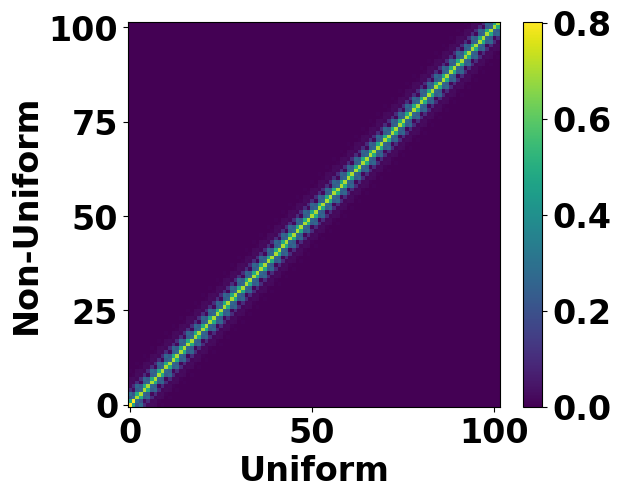

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.weight'] = 'bold'
plt.rcParams.update({'font.size': 24})
# Generate a 2D array (for example, a 2D Gaussian function)
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = abs(UnitRR)

# Create the plot
plt.figure(figsize=(6, 5))
plt.imshow(Z, origin='lower', cmap='viridis', aspect='auto', vmin=0)

# Add a color bar
plt.colorbar()

# Add labels and title
plt.xlabel('Uniform',fontweight='bold',fontsize=24)
plt.ylabel('Non-Uniform',fontweight='bold', fontsize=24)
#plt.title('2D Color Plot of a Gaussian Function', fontsize=16)

# Save the figure as a high-resolution PNG file
#fig.tight_layout()

# Save the figure as a high-resolution PNG file
plt.savefig('Overlap.png', dpi=500, bbox_inches='tight')

# Show the plot
plt.show()


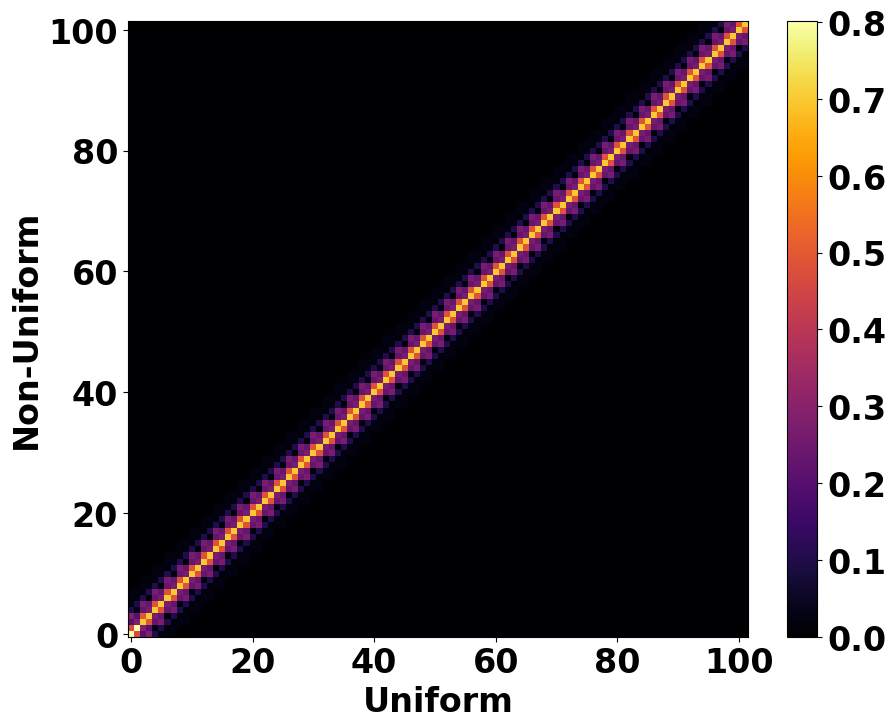

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.weight'] = 'bold'
plt.rcParams.update({'font.size': 24})

# Generate a 2D array (for example, a 2D Gaussian function)
Z = abs(UnitRR)

# Apply power normalization to enhance lower values
norm = mcolors.PowerNorm(gamma=1)  # Adjust the gamma value to change the contrast

# Create the plot
plt.figure(figsize=(10,8))
plt.imshow(Z, origin='lower', cmap='inferno', aspect='auto', norm=norm)

# Add a color bar
plt.colorbar()

# Add labels and title
plt.xlabel('Uniform',fontweight='bold',fontsize=24)
plt.ylabel('Non-Uniform',fontweight='bold', fontsize=24)
#plt.title('2D Color Plot of a Gaussian Function', fontsize=16)

# Save the figure as a high-resolution PNG file
plt.savefig('Overlap2DD.png', dpi=500, bbox_inches='tight')

# Show the plot

In [44]:
Lev = np.linspace(1,50,50)
Eng = (Lev**2)*((np.pi*hbar)**2)/(2*mf*((a*Np)**2)*(1.6*1e-19))

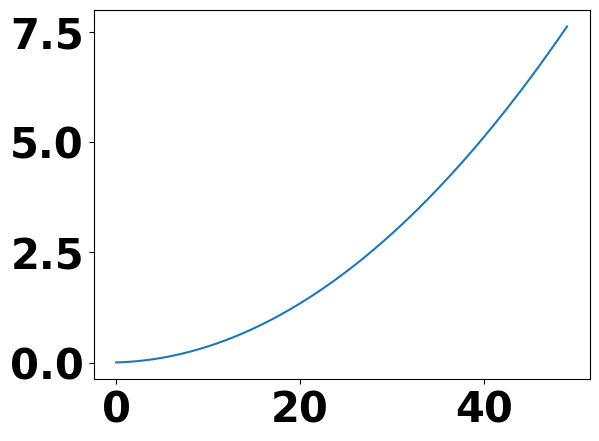

In [45]:
plt.plot(Eng)

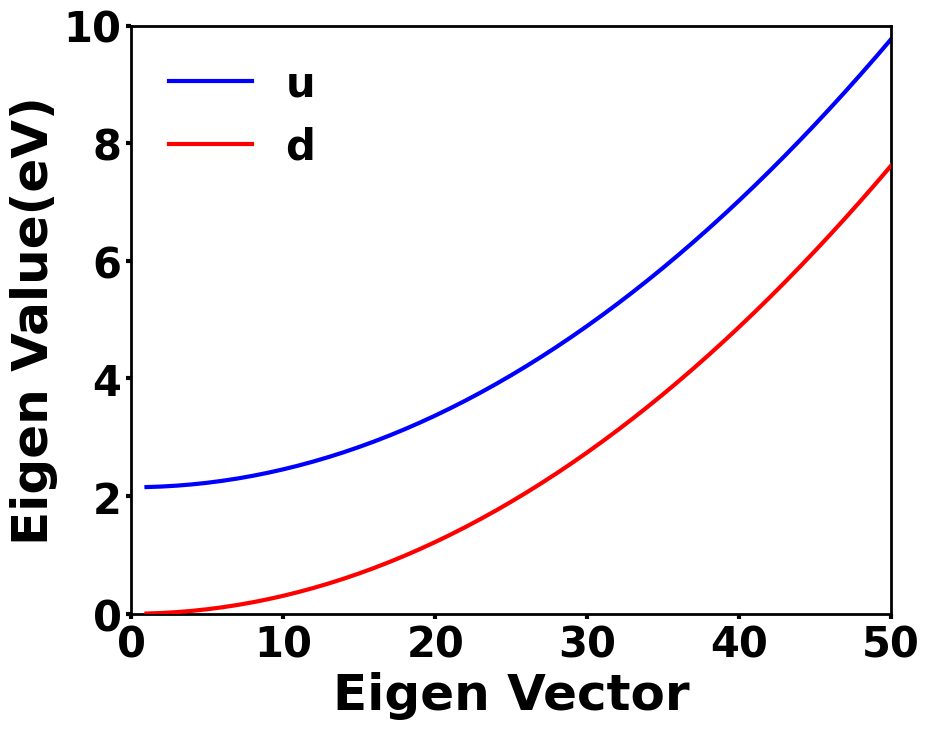

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Load your data
I_anti = Eng
I_par = Eng+2.15

x = Lev
y2 = I_anti
y1 = I_par

# Configure font settings
plt.rcParams['font.weight'] = 'bold'
plt.rcParams.update({'font.size': 30})

# Create a figure with a white background
fig = plt.figure(figsize=(10, 8))
fig.patch.set_facecolor('white')

# Plot the data and set line properties
cp, = plt.plot(x, y1, label='d', color='b', linewidth=3)
cn, = plt.plot(x, y2, label='u', color='r', linewidth=3, zorder=3)

# Set labels and title
plt.xlabel('Eigen Vector', fontweight='bold', fontsize=36)
plt.ylabel('Eigen Value(eV)', fontweight='bold', fontsize=36)

# Set custom axis limits and tick positions
x_min, x_max = 0, 50
y_min, y_max = 0, 10
x_ticks = [-0.2, -0.1, 0, 0.1, 0.2]
y_ticks = [-40, -20, 0,20, 40]

#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Create a legend without a box outline
lgd = plt.legend([cp, cn], ['u', 'd'])
lgd.set_frame_on(False)

# Customize tick parameters and spines
plt.gca().tick_params(axis='both', which='major', width=3)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

plt.tight_layout()
plt.savefig('Eig2D.png')

# Show the plot
plt.show()
